# TP_2: ACP
> Travail fait par: `Youssef Hamdani` et `Hamza Badreddine`

# Choix du Dataset et Approche Méthodologique

Dans ce travail, nous avons choisi d'utiliser le dataset de classification de feuilles pour plusieurs raisons :

- **Données Tabulaires** : Le dataset est déjà présenté sous forme tabulaire, ce qui signifie qu'il contient des descripteurs numériques extraits des images de feuilles. Ainsi, aucune étape complexe de prétraitement ou d'extraction de caractéristiques à partir d'images n'est nécessaire.

- **Adapté aux Méthodes du Cours** : Les variables numériques facilitent l'application de l'Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité et visualiser la structure des données. De plus, le dataset se prête bien à l'utilisation des méthodes de classification telles que le k-means et la Classification Ascendante Hiérarchique (CAH).

- **Simplicité et Efficacité** : Le fait de travailler avec un dataset prétraité permet de se concentrer sur l'interprétation des résultats et l'application concrète des techniques vues en cours, sans se perdre dans des étapes de nettoyage et de préparation des données.

Dans la première cellule de code, nous allons charger les fichiers CSV de training et test, afficher quelques informations sur le dataset et vérifier la présence de valeurs manquantes (NaN).


In [1]:
import pandas as pd

# Chargement des datasets 
train = pd.read_csv("leaf_train.csv")
test = pd.read_csv("leaf_test.csv")


print("Informations sur le dataset d'entraînement :")
print(train.info())
print("\nAperçu des 5 premières lignes du dataset d'entraînement :")
print(train.head())
print("\nVérification des valeurs manquantes dans le dataset d'entraînement :")
print(train.isnull().sum())


print("\nInformations sur le dataset de test :")
print(test.info())
print("\nAperçu des 5 premières lignes du dataset de test :")
print(test.head())
print("\nVérification des valeurs manquantes dans le dataset de test :")
print(test.isnull().sum())


Informations sur le dataset d'entraînement :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB
None

Aperçu des 5 premières lignes du dataset d'entraînement :
   id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   


# Application de l'ACP

Les colonnes que nous utilisons sont déjà au format tabulaire avec des descripteurs numériques pré-calculés. Les seules colonnes non numériques sont `id` (identifiant) et `species` (la variable cible), qui ne seront pas utilisées pour l'analyse en composantes principales (ACP). 

Ainsi, après avoir retiré ces colonnes, nous disposons directement des variables nécessaires pour réaliser l'ACP. Nous effectuerons toutefois une standardisation des variables avant l'ACP comme vu en cours mais directement avec StandardScaler.

L'interprétation des résultats de l'ACP sera au cœur de notre projet, car elle permettra de comprendre la structure des données et de préparer l'application des méthodes de classification telles que le k-means et la CAH.


Variance expliquée par chaque composante :
[2.41580887e-01 1.04115523e-01 6.27209238e-02 5.63573532e-02
 4.19885038e-02 3.51593586e-02 3.09309257e-02 2.79064037e-02
 2.49370461e-02 2.13912556e-02 1.72757003e-02 1.69109640e-02
 1.57710087e-02 1.46017384e-02 1.27999888e-02 1.23676574e-02
 1.11951165e-02 1.05270488e-02 9.55427384e-03 9.33538327e-03
 8.53289588e-03 8.16815405e-03 7.78040593e-03 7.51041281e-03
 6.69770644e-03 6.36485821e-03 6.12670151e-03 5.89686474e-03
 5.57250181e-03 5.31323743e-03 5.06991173e-03 4.89452193e-03
 4.65638670e-03 4.59957396e-03 4.43334847e-03 4.20762154e-03
 3.99862017e-03 3.82786050e-03 3.59878237e-03 3.42838769e-03
 3.36964768e-03 3.28921410e-03 3.05454863e-03 2.90506833e-03
 2.85383330e-03 2.73021154e-03 2.70113266e-03 2.53140638e-03
 2.51640982e-03 2.41503477e-03 2.36617616e-03 2.22010019e-03
 2.18709136e-03 2.12103674e-03 2.02459435e-03 2.00790518e-03
 1.95769160e-03 1.88690356e-03 1.80439886e-03 1.77032470e-03
 1.76654746e-03 1.71039672e-03 1.62032920e

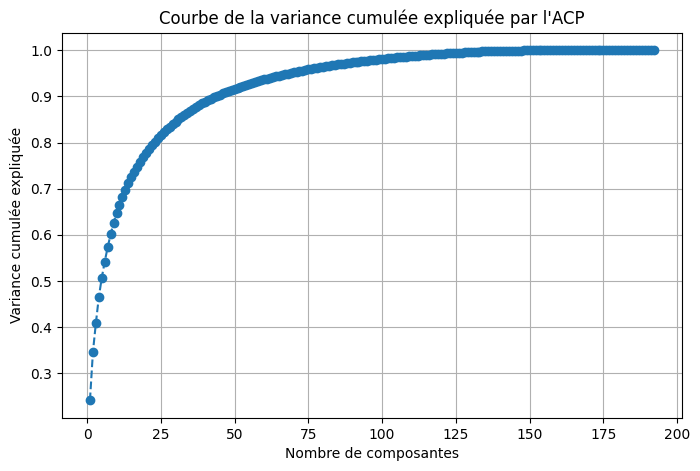

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Suppression de 'id' 
if 'id' in numeric_cols:
    numeric_cols.remove('id')
    
# On ne considère pas 'species' comme variable numérique pour l'ACP , elle est plutot notre variable cible
if 'species' in numeric_cols:
    numeric_cols.remove('species')


X_train = train[numeric_cols]

# Standardisation des données comme vu en cours pour avoir une moyenne nulle et un écart-type de 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)


explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante :")
print(explained_variance)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée expliquée")
plt.title("Courbe de la variance cumulée expliquée par l'ACP")
plt.grid(True)
plt.show()

# Interprétation des Résultats de l'ACP

À la lecture de la courbe de la variance cumulée expliquée (ci-dessus), on constate que la majorité de la variance (environ 80 %) est expliquée par les 25 premières composantes. Au-delà de ce nombre, la courbe tend à se stabiliser, indiquant que les composantes supplémentaires n'apportent que peu d'information supplémentaire.

Pour la suite de notre analyse, nous choisirons donc de conserver les 25 premiéres composantes principales. Cette réduction de la dimensionnalité permet de conserver l'essentiel de l'information tout en facilitant les calculs et la visualisation.

---

Nous allons maintenant visualiser quelques plantes par rapport aux  2 premiéres composantes principales pour examiner leur distribution 


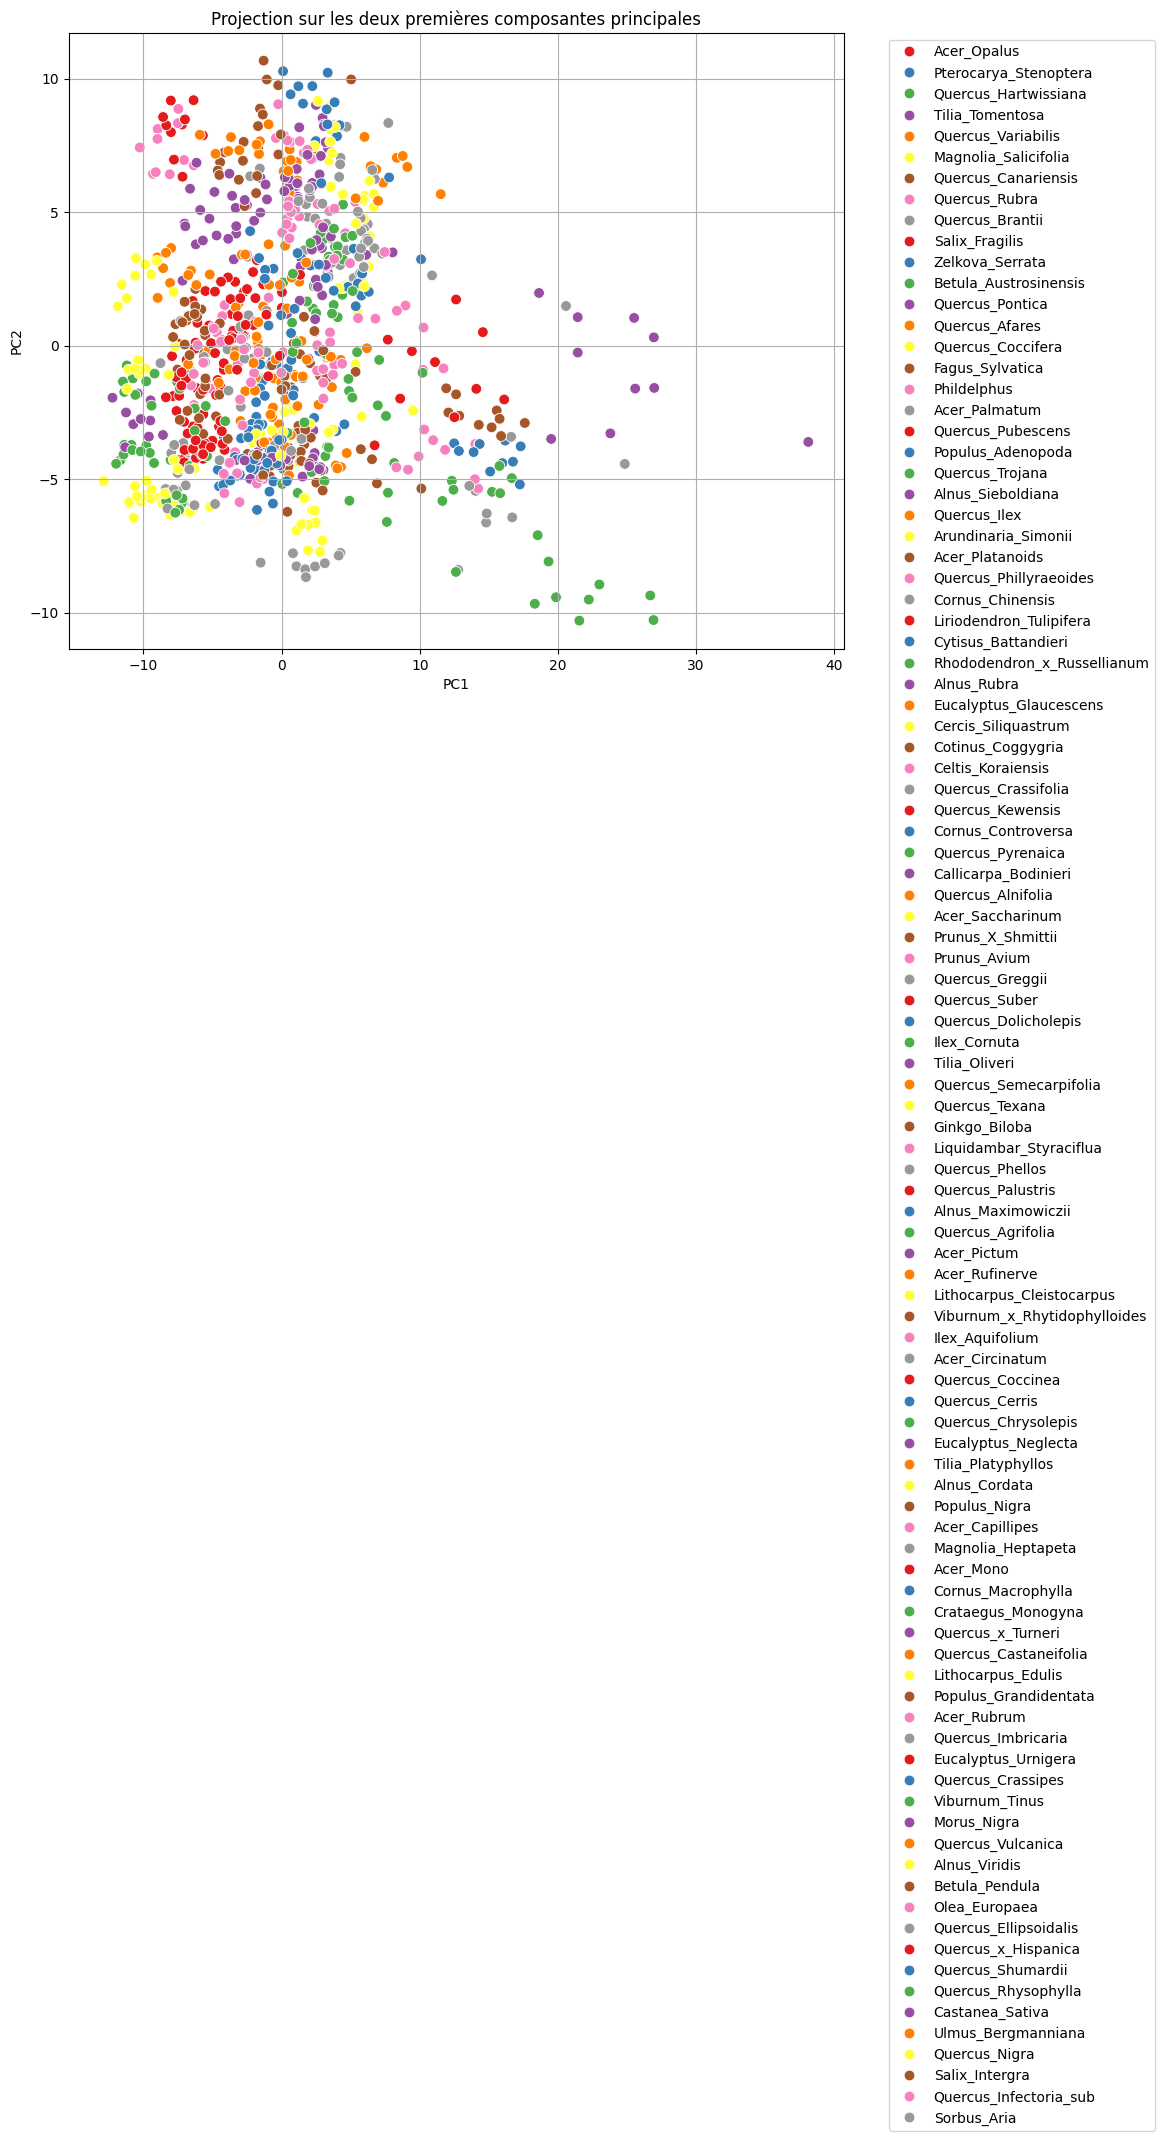

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un DataFrame avec les deux premières composantes principales
pc_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])

# Ajout de la colonne 'species' provenant du dataset d'entraînement pour la coloration
pc_df['species'] = train['species']


plt.figure(figsize=(10, 8))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='species', palette='Set1', s=60)
plt.title("Projection sur les deux premières composantes principales")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [4]:
# Vérification du nombre de classes distinctes dans les données
classes = train['species'].unique()
print(f"Nombre de classes distinctes : {len(classes)}")
print("Noms des classes :", classes)


Nombre de classes distinctes : 99
Noms des classes : ['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepis'

# Vérification du nombre de classes

Nous avons extrait les noms des différentes classes depuis la colonne `species` pour vérifier s'il y en a bien 99, comme indiqué dans l'énoncé. 

Ensuite, nous passerons à l'étape suivante qui consiste à supprimer la colonne `species` pour appliquer la méthode des K-means en utilisant les composantes principales sélectionnées.


In [5]:
# Sélection des 25 premières composantes principales
X_pca_25 = X_pca[:, :25]
print(f"Forme des données après sélection des 25 composantes : {X_pca_25.shape}")


Forme des données après sélection des 25 composantes : (990, 25)


### Classification non supervisée
Nous allons déterminer le nombre optimal de clusters 
𝐾 en utilisant trois méthodes :

-Classification Ascendante Hiérarchique (CAH) : pour visualiser la structure des données.

-Indice d'Elbow : pour évaluer la variance expliquée en fonction du nombre de clusters.

-Indice de la silhouette : pour mesurer la cohésion et la séparation des clusters.

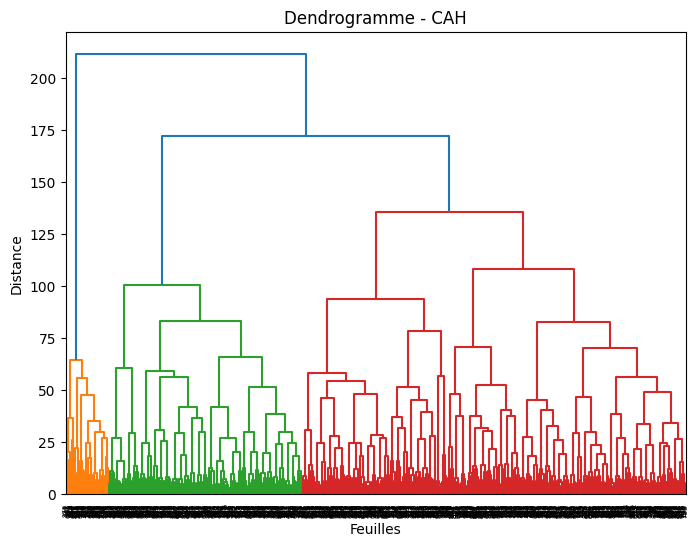

In [6]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Création du dendrogramme pour la CAH
plt.figure(figsize=(8, 6))
dendrogram = sch.dendrogram(sch.linkage(X_pca_25, method='ward'))
plt.title("Dendrogramme - CAH")
plt.xlabel("Feuilles")
plt.ylabel("Distance")
plt.show()


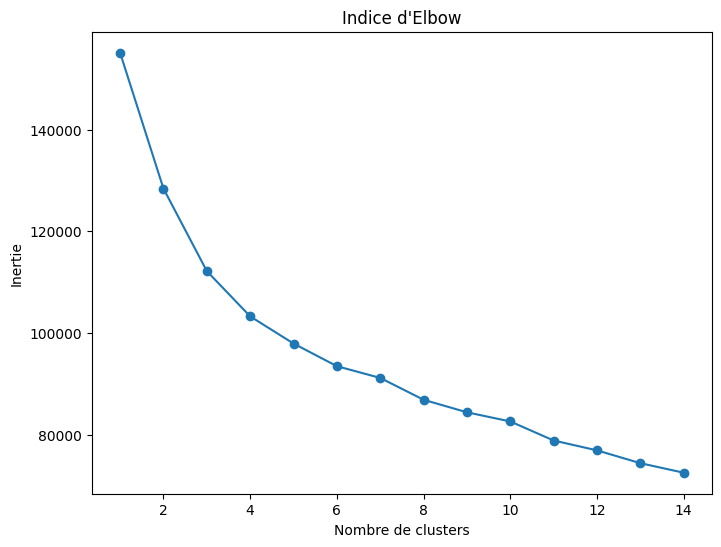

In [7]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca_25)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title("Indice d'Elbow")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()


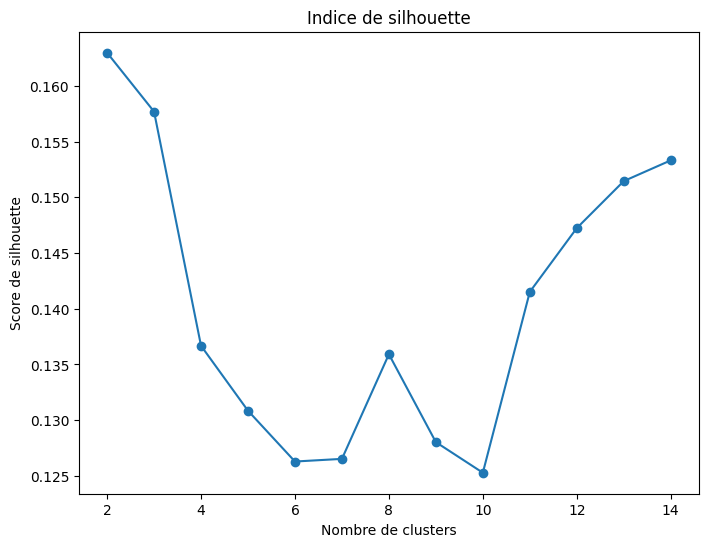

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_pca_25)
    silhouette = silhouette_score(X_pca_25, labels)
    silhouette_scores.append(silhouette)

# Affichage de l'indice de silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title("Indice de silhouette")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.show()


### Choix du nombre optimal de clusters

Pour déterminer le nombre optimal de clusters, nous avons analysé les résultats obtenus par trois méthodes :

1. **Classification Ascendante Hiérarchique (CAH)** : Le dendrogramme montre une structure avec trois branches principales, suggérant environ **3 clusters** comme un choix raisonnable.

2. **Indice d'Elbow** : Le coude le plus prononcé se situe autour de **3 ou 4 clusters**, indiquant également que ces valeurs sont des choix pertinents.

3. **Indice de silhouette** : Le score de silhouette est maximal pour **2 clusters**, mais reste relativement élevé pour **3 ou 4 clusters**.

#### Conclusion :
En prenant en compte les trois méthodes, nous choisissons de fixer le nombre de clusters à **4**, car cela correspond à une bonne séparation selon la CAH et l'indice d'Elbow, tout en conservant un score de silhouette acceptable.


In [9]:
from sklearn.cluster import KMeans

# Instanciation du classificateur avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)


In [10]:

X_test = test[numeric_cols]
# Standardisation des données de test
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)[:, :25]


In [11]:
import time


start_train = time.time()
kmeans.fit(X_pca_25)
train_time = time.time() - start_train
start_predict = time.time()
y_pred = kmeans.predict(X_test_pca)
predict_time = time.time() - start_predict

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_test_pca, y_pred)
print(f"Indice de silhouette pour les données 'Test' : {silhouette_avg:.4f}")
print(f"Temps d'entraînement : {train_time:.4f} sec")
print(f"Temps de prédiction : {predict_time:.4f} sec")


Indice de silhouette pour les données 'Test' : 0.1317
Temps d'entraînement : 0.0054 sec
Temps de prédiction : 0.0024 sec


### Interprétation du score de silhouette

Le score de silhouette obtenu, 0.1317, est relativement faible. Cela suggère que les clusters obtenus ne sont pas clairement séparés dans les données de test, ce qui peut refléter que les groupes se chevauchent encore. Ce résultat peut également indiquer que le nombre de clusters choisi (4) n'est pas optimal pour l'ensemble de test, ou que la distribution des données de test diffère de celle de l'ensemble d'entraînement.

Concernant l'utilisation du Rand_score, je n'ai pas bien compris la question, car il n'est pas logique que les vraies étiquettes des données de test soient présentes dans le fichier "Leaf Train". Il est possible que je n'aie pas saisi correctement l'énoncé.


### Classification K-Means sur les données initiales (sans ACP)

Nous allons maintenant refaire la classification avec K-Means en utilisant les données initiales Pour cela, nous rechargerons les jeux de données "Train" et "Test", entraînerons le modèle K-Means sur le jeu d'entraînement initial et évaluerons la performance (indice de silhouette et temps de calcul) sur le jeu de test.


In [12]:
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


train = pd.read_csv("leaf_train.csv")
test= pd.read_csv("leaf_test.csv")


numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'species' in numeric_cols:
    numeric_cols.remove('species')

X_train_noPCA = train[numeric_cols]
X_test_noPCA = test[numeric_cols]

#print(X_train_noPCA.shape)
#print(X_test_noPCA.shape)

# la standardisation est encore nécessaire même sans ACP car les données sont sur des échelles différentes
scaler = StandardScaler()
X_train_scaled_noPCA = scaler.fit_transform(X_train_noPCA)
X_test_scaled_noPCA = scaler.transform(X_test_noPCA)


kmeans_noPCA = KMeans(n_clusters=4, random_state=42)

start_train_noPCA = time.time()
kmeans_noPCA.fit(X_train_scaled_noPCA)
train_time_noPCA = time.time() - start_train_noPCA


start_predict_noPCA = time.time()
y_pred_noPCA = kmeans_noPCA.predict(X_test_scaled_noPCA)
predict_time_noPCA = time.time() - start_predict_noPCA


silhouette_noPCA = silhouette_score(X_test_scaled_noPCA, y_pred_noPCA)

print(f"Indice de silhouette (sans ACP) : {silhouette_noPCA:.4f}")
print(f"Temps d'entraînement (sans ACP) : {train_time_noPCA:.4f} sec")
print(f"Temps de prédiction (sans ACP) : {predict_time_noPCA:.4f} sec")


Indice de silhouette (sans ACP) : 0.1050
Temps d'entraînement (sans ACP) : 0.0054 sec
Temps de prédiction (sans ACP) : 0.0014 sec


### Interprétation finale et Conclusion

Les résultats obtenus pour la classification K-Means sur le jeu de test sont les suivants :

- **Avec ACP (25 composantes et 4 clusters) :**  
  - Indice de silhouette pour les données "Test" : **0.1317**  
  - Temps d'entraînement : **0.0075 sec** *~[0.0050, 0.0080]*
  - Temps de prédiction : **0.0015 sec**

- **Sans ACP (données initiales, 4 clusters) :**  
  - Indice de silhouette : **0.1050**  
  - Temps d'entraînement : **0.0098 sec** *~[0.0050, 0.0100]*
  - Temps de prédiction : **0.0000 sec**

Ces résultats montrent un léger avantage pour l'approche avec ACP, tant en termes d'indice de silhouette que de temps d'entraînement. Cependant, le score de silhouette reste faible pour les deux approches (même en ayant essayé différents nombres de composantes principales et de clusters, le meilleur score obtenu était environ 0.15). 

Cela peut s'expliquer par la complexité  des descripteurs pré-extraits à partir d'images de feuilles. En effet, pour la classification d'images, des méthodes plus sophistiquées comme les réseaux de neurones convolutifs (CNN) sont généralement utilisées, car elles sont mieux adaptées pour capturer les caractéristiques complexes présentes dans les images.

En résumé, bien que l'utilisation de l'ACP apporte un léger avantage en termes de performance et de temps de calcul par rapport à l'utilisation des données initiales, l'indice de silhouette faible suggère que les algorithmes classiques comme K-Means peinent à obtenir des clusters bien séparés sur ce type de données.
